# WeatherPy
1)
2)
3)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

141


### API Calls
* Perform a weather check on each city using a series of successive API calls
* Print log of each city as it's being processed


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found... Skipping.")

Processing record 1|melbourne
Processing record 2|tuktoyaktuk
City not found... Skipping.
Processing record 3|olinda
Processing record 4|griffith
City not found... Skipping.
Processing record 5|grand-santi
Processing record 6|bure
Processing record 7|castro
City not found... Skipping.
Processing record 8|bengkulu
Processing record 9|gubkinskiy
Processing record 10|buala
Processing record 11|escanaba
Processing record 12|avarua
Processing record 13|ligayan
Processing record 14|mezhdurechensk
Processing record 15|mataura
Processing record 16|kruisfontein
Processing record 17|iqaluit
Processing record 18|kapaa
Processing record 19|chuy
Processing record 20|talnakh
Processing record 21|pangoa
Processing record 22|lorengau
Processing record 23|ulladulla
Processing record 24|ribeira grande
Processing record 25|qaanaaq
Processing record 26|cabo san lucas
Processing record 27|busselton
Processing record 28|puerto maldonado
Processing record 29|sao filipe
Processing record 30|georgetown
Process

### Create dataframe of cities

In [4]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
#rename axis
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/city.csv")

#Displaying dataframe
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Melbourne,1,US,1619905204,57,28.0836,-80.6081,82.40,11.50
1,Tuktoyaktuk,90,CA,1619904796,92,69.4541,-133.0374,14.00,5.75
2,Olinda,75,BR,1619905230,69,-8.0089,-34.8553,80.60,9.22
3,Griffith,1,US,1619905230,36,41.5284,-87.4237,80.60,19.57
4,Grand-Santi,73,GF,1619905231,97,4.2500,-54.3833,74.35,2.68
...,...,...,...,...,...,...,...,...,...
121,Carnarvon,100,AU,1619905106,64,-24.8667,113.6333,68.00,10.36
122,Anadyr,40,RU,1619905263,79,64.7500,177.4833,14.00,11.18
123,Ilulissat,18,GL,1619905264,42,69.2167,-51.1000,46.40,12.66


In [5]:
#Check data
city_df.count()

City          126
Cloudiness    126
Country       126
Date          126
Humidity      126
Lat           126
Lng           126
Max Temp      126
Wind Speed    126
dtype: int64

## Plotting the Data

In [6]:
#Find date of analysis

date = dt.datetime.today().strftime("%m/%d/%Y")
#date

'05/01/2021'

## Latitude vs. Temperature Plot

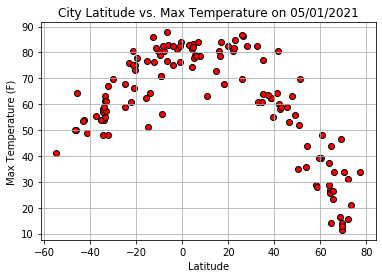

In [7]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature on {date}")
plt.savefig("../output_data/Lat_vs_temp_plot")

## Latitude vs. Humidity Plot

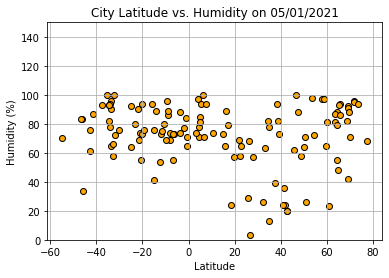

In [8]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity on {date}")
plt.savefig("../output_data/plot_lat_vs_hum")

## Latitude vs. Cloudiness Plot

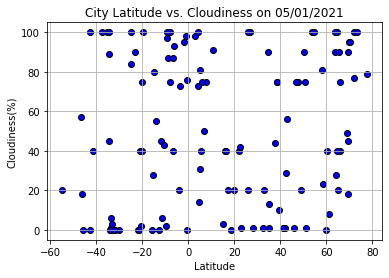

In [9]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness on {date}")
plt.savefig("../output_data/plot_lat_vs_clouds")

## Latitude vs. Wind Speed Plot

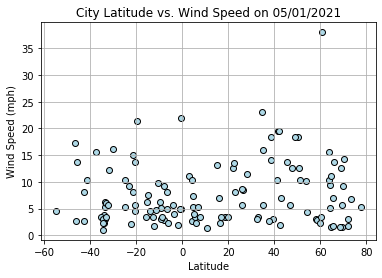

In [10]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "lightblue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed on {date}")
plt.savefig("../output_data/plot_lat_windspeed")

## Linear Regression

In [11]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8908908245028534
None


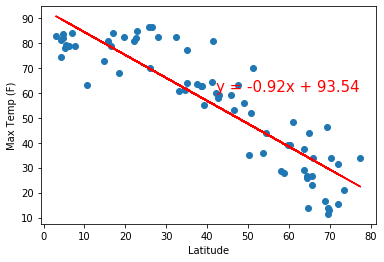

In [13]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8127412285954361
None


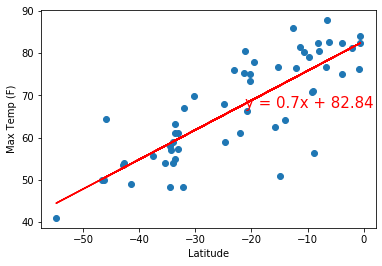

In [14]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09159928814019586
None


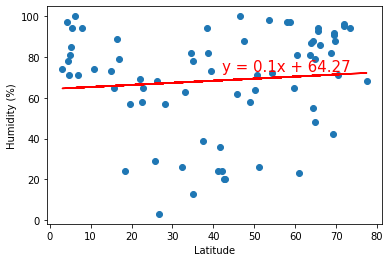

In [15]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07356876054402985
None


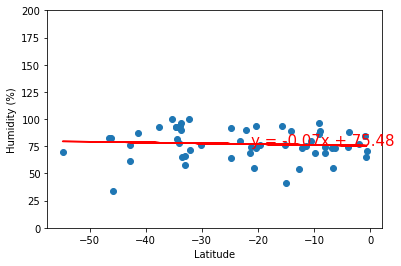

In [16]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17015164573245925
None


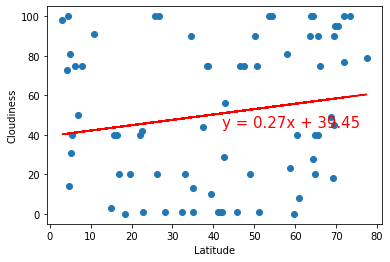

In [17]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27904280482477833
None


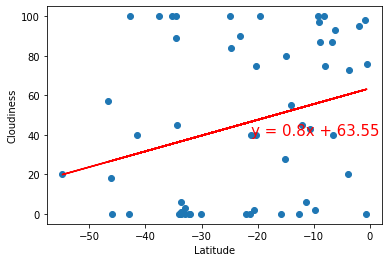

In [18]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10946402530562493
None


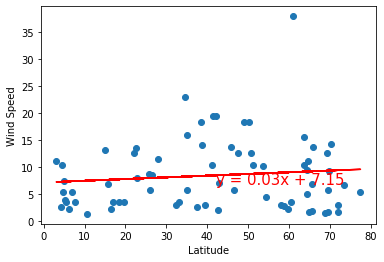

In [19]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08087226292253004
None


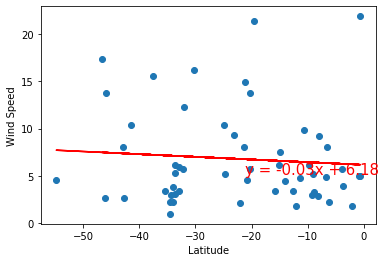

In [20]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))